## In this code block, we will load the Titanic dataset, perform some data analysis, and generate visualizations to understand the data better.

## 1. Importing libraries

First we import all the libraries to load and visualize the data so it can be used to make predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


## 2. Loading the data

Next, we load and display the raw data file to check what kind of data we are dealing with.

In [2]:
data = pd.read_csv(".\\Datasets\\price_paid_records.csv")
data.columns = data.columns.str.lower()
data

,transaction unique identifier,price,date of transfer,property type,old/new,duration,town/city,district,county,ppdcategory type,record status - monthly file only
0,{81B82214-7FBC-4129-9F6B-4956B4A663AD},25000,1995-08-18 00:00,T,N,F,OLDHAM,OLDHAM,GREATER MANCHESTER,A,A
1,{8046EC72-1466-42D6-A753-4956BF7CD8A2},42500,1995-08-09 00:00,S,N,F,GRAYS,THURROCK,THURROCK,A,A
2,{278D581A-5BF3-4FCE-AF62-4956D87691E6},45000,1995-06-30 00:00,T,N,F,HIGHBRIDGE,SEDGEMOOR,SOMERSET,A,A
3,{1D861C06-A416-4865-973C-4956DB12CD12},43150,1995-11-24 00:00,T,N,F,BEDFORD,NORTH BEDFORDSHIRE,BEDFORDSHIRE,A,A
4,{DD8645FD-A815-43A6-A7BA-4956E58F1874},18899,1995-06-23 00:00,S,N,F,WAKEFIELD,LEEDS,WEST YORKSHIRE,A,A
...,...,...,...,...,...,...,...,...,...,...,...
22489343,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A
22489344,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A
22489345,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A
22489346,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A


## 3. Plotting the data

**3.1 Price distribution**

**3.1.1 Histogram**

Now we start plotting our different graphs to helps us better understand our data.

We start by plotting a histogram of the distribution of the `price`. These prices are log scaled, which means that the price is 10 raised to the value above the 10 (for example 10² = 100). We can see that the graph is left skewed, which means most of the values are located more to the right. We can also see that most of the prices are between 10-4 and 10-5.

The ditribution is capped at the 99 percentile to improve the visualization. The extreme values make it hard to see the visualization for predictions and see the overall trends.

C:\Users\woutp\AppData\Local\Temp\ipykernel_28604\455921431.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_prices['price'], shade=True, color="skyblue")


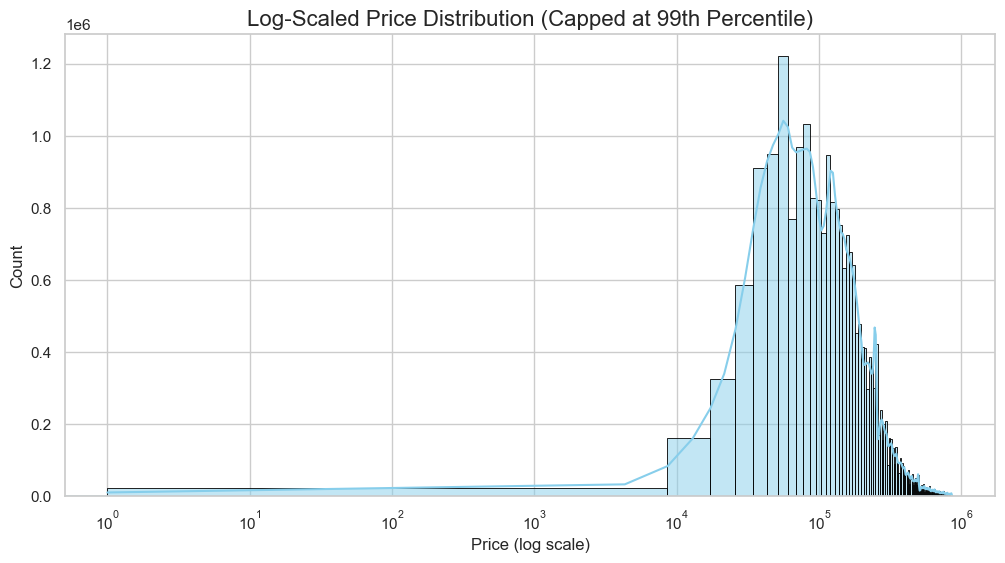

In [3]:
# Histogram of price distribution
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Limit the x-axis to focus on the main distribution
price_cap = data['price'].quantile(0.99)
filtered_prices = data[data['price'] <= price_cap]

# Plot with log scale and aesthetic improvements
sns.histplot(filtered_prices['price'], bins=100, kde=True, color="skyblue", edgecolor="black")
sns.kdeplot(filtered_prices['price'], shade=True, color="skyblue")
plt.xscale('log')  # Log-transform the x-axis for better visibility of lower prices

# Title and labels
plt.title('Log-Scaled Price Distribution (Capped at 99th Percentile)', fontsize=16)
plt.xlabel('Price (log scale)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

**3.1.2 Box plot**

Next up we create a box plot of the `price distribution`. This boxplot shows us that a there are a lot of outliers, located roughly after 500.000.

C:\Users\woutp\AppData\Local\Temp\ipykernel_28604\1605566722.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=data, palette="Set2")


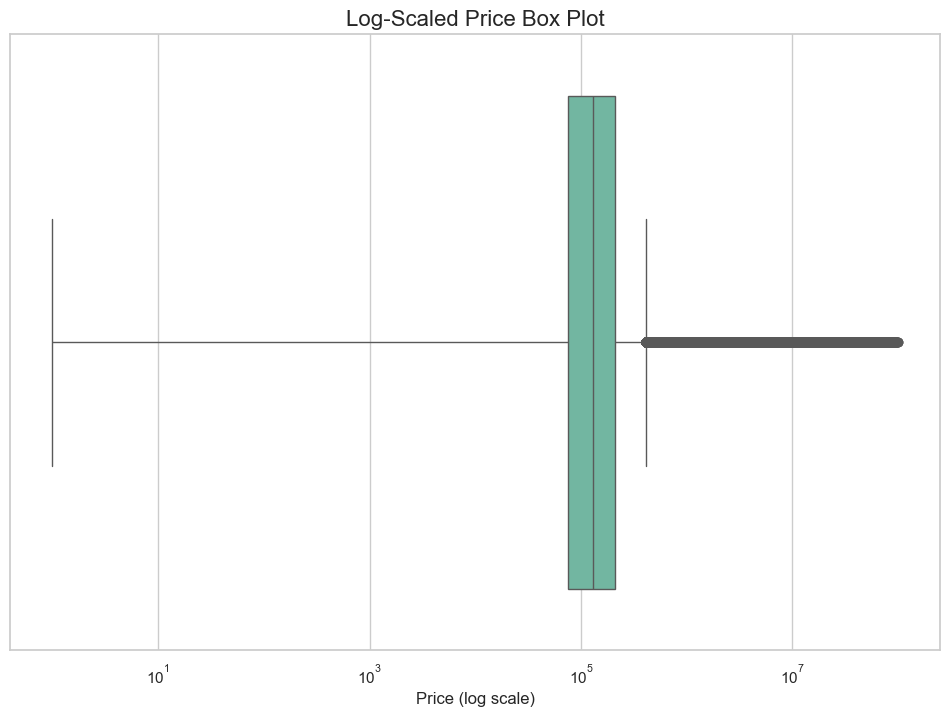

In [4]:
# Box plot of price distribution
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Customizing the box plot
sns.boxplot(x='price', data=data, palette="Set2")
plt.xscale('log')  # Log-transform the x-axis for better visibility of lower prices

# Adding title and labels
plt.title('Log-Scaled Price Box Plot', fontsize=16)
plt.xlabel('Price (log scale)', fontsize=12)

# Show the plot
plt.show()

**3.2 Price over time**

**3.2.1 Overall prices**

We then plot the `price` in a time series, which gives us an overview of the price trends over a certain period of time. From this plot we can see that the general trend is going up. With the prices at the end even being 5 times as high as the values when the plot starts. This may be because not many sales were registered in the beginning and the houses were worth less. We can see a big drop in 2009 due to housing market crash. The housing market is in the meantime more or less recovered from this housing market crash.

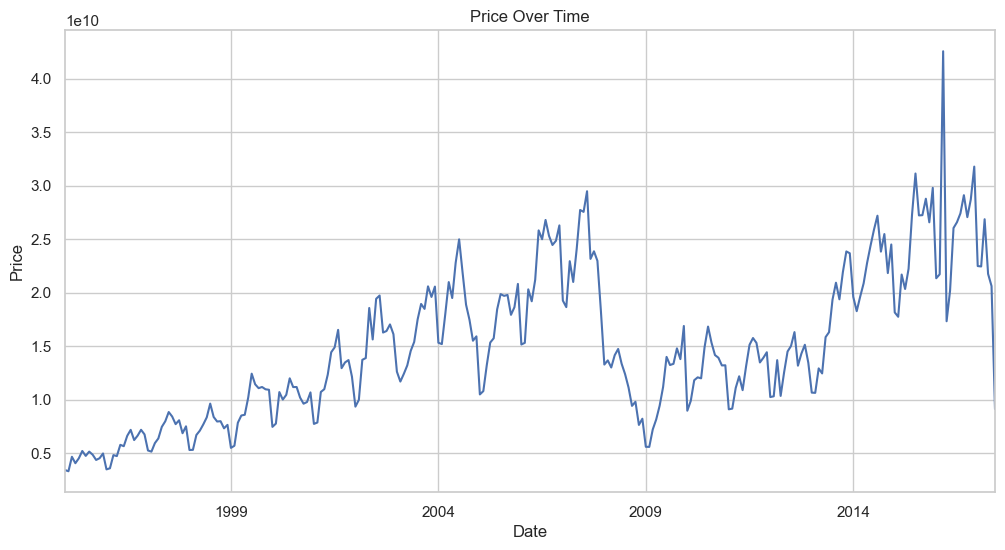

<Figure size 1400x800 with 0 Axes>

<Figure size 1400x800 with 0 Axes>

In [5]:
# Time series plot of price over time
data['date of transfer'] = pd.to_datetime(data['date of transfer'])
data.set_index('date of transfer').resample('M')['price'].sum().plot(figsize=(12, 6))
plt.title('Price Over Time')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

**3.2 Prices of the 5 districts with the highest housing prices**

Next up we made a graph that compared the 5 `districts` with the highest housing prices to see whether there is a trend or not. The `districts` we chose are `City of Westminster`, `Kensington and Chelsea`, `Wandsworth`, `Birmingham` and `Barnet`.

In this graph we can also see that the general trend is upward with a drop in 2009 due to the housing market crash. We can also see that the housing prices in each of these `districts` significanty increases in 2013-2014. This can be contributed by the economic recovery after the 2008 financial crisis. There was an increased demand for housing in these prime locations. Government policies or incentives may have also contributed to the significant increase in the prices for the housing market.

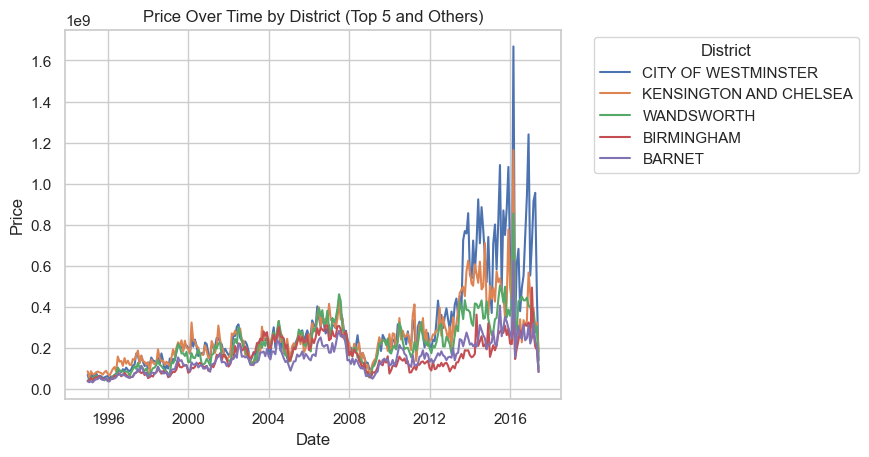

In [6]:

# Group by date and district, then calculate the mean price
district_prices = data.groupby([data['date of transfer'].dt.to_period('M'), 'district'])['price'].sum().unstack()

# Calculate the average price for each district over the entire period
average_prices = district_prices.mean().sort_values(ascending=False)

# Select the top 5 districts with the highest average prices
top_5_districts = average_prices.head(5).index

# Create a new DataFrame to hold the top 5 districts and group others
district_prices_top_5 = district_prices[top_5_districts]

# Plot each district's price trend
for district in district_prices_top_5.columns:
    plt.plot(district_prices_top_5.index.to_timestamp(), district_prices_top_5[district], label=district)

# Adding title and labels
plt.title('Price Over Time by District (Top 5 and Others)')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**3.3 Heat map**

Next up we plotted a heat map of the `average prices` by year and month. This graph shows us the average pricing trend divided by month and year. The color intensity shows us how the prces evolve over time. The darker the colors, how higher the prices. This heat map also alows us to accuratly and quickly view yearly changes and/or anomalies like unexpected spikes or drops. 

In the heat map we can see a steady increase in `average price` from the years 1995 until November 2008. In December 2008 we see a sudden price dop of rouhly £4000. This is thanks to the economic crisis of 2008. The average prices then kept on dzecreasing until March 2009. From then on, the `average price` kept on increasing with some small drops in November and December of 2012 and OCtober and Novermber of 2015. We can also see a sudden price drop in 2017.

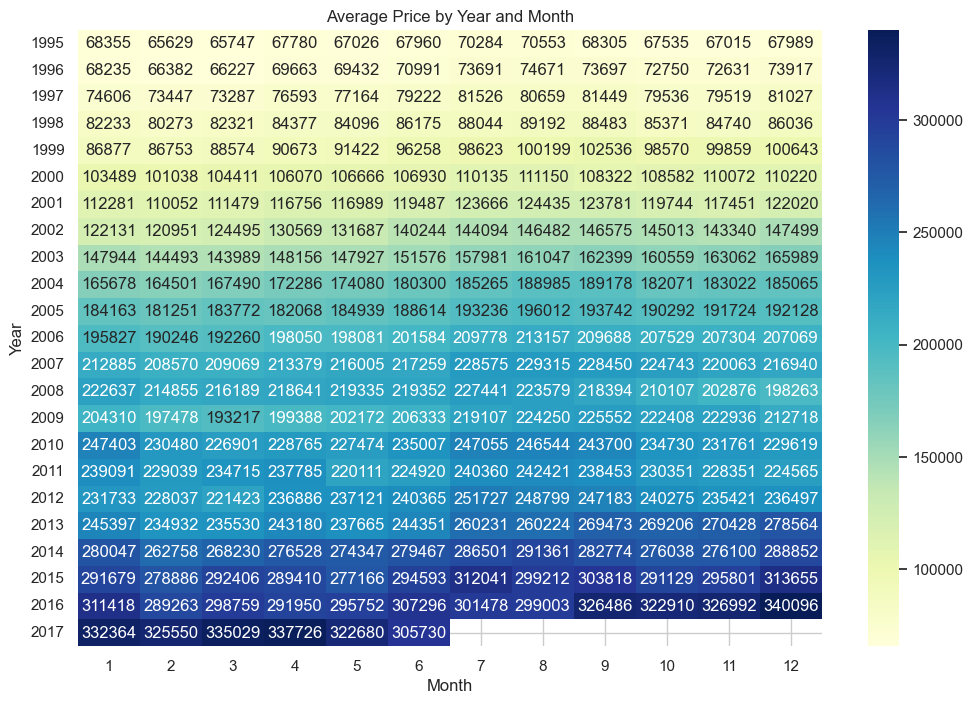

In [7]:
# Heat map of price over time
data['year'] = data['date of transfer'].dt.year
data['month'] = data['date of transfer'].dt.month
pivot = data.pivot_table(values='price', index='year', columns='month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

**3.3 Plotting the prices by property type**

After plotting the heat map, we plotted the sum of all the prices of the houses over time. We split the visualization in th different `property types` the dataset contains. This allows us to see the general trend of the prices of the different `property types`. We can see that the different property types follow the general trend. We can also see the sudden drop in prices thanks to the financial crisis in 2008 and 2009. 

We can also see the O property type growing rapidly in 2013-2014.

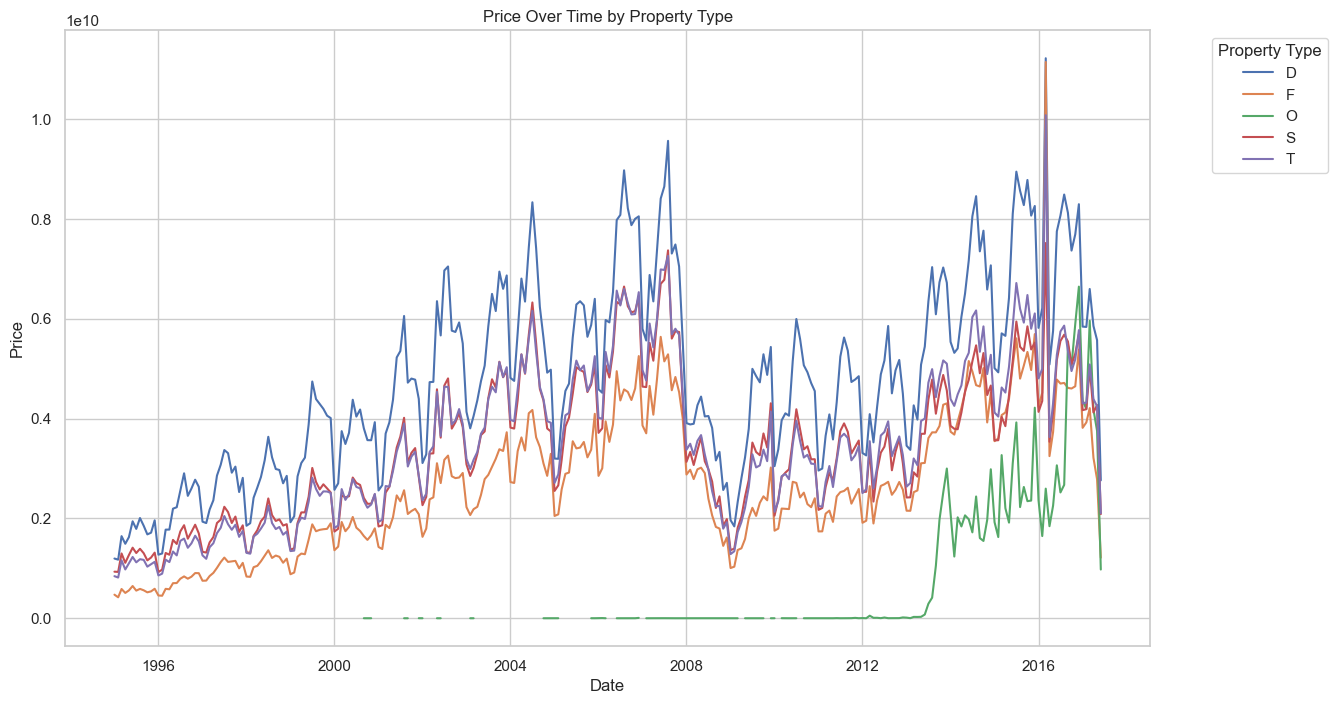

In [8]:
# Line plot of price over time by property type
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

# Group by date and property type, then calculate the mean price
property_type_prices = data.groupby([data['date of transfer'].dt.to_period('M'), 'property type'])['price'].sum().unstack()

# Plot each property type's price trend
for property_type in property_type_prices.columns:
    plt.plot(property_type_prices.index.to_timestamp(), property_type_prices[property_type], label=property_type)

# Adding title and labels
plt.title('Price Over Time by Property Type')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

**3.4 Counting the amount of New and Old properties**

This graph shows us a comparison between the amount of sales of `old` and `new` properties. As we can see from the graph, a lot more `old` properties are sold than `new` properties. This is because `old` properties are most often less costly as `new` ones. There are also more `old` properties available in the housing market as `new` ones.

C:\Users\woutp\AppData\Local\Temp\ipykernel_28604\2198056321.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='old/new', y='price', ci=None, data=data, estimator='count')


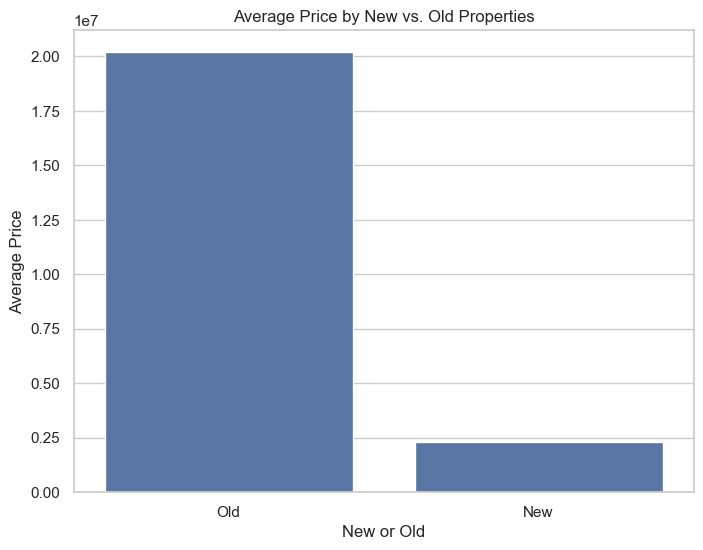

In [10]:
# Bar plot of price by new vs. old properties
plt.figure(figsize=(8, 6))
sns.barplot(x='old/new', y='price', ci=None, data=data, estimator='count')
plt.title('Average Price by New vs. Old Properties')
plt.xlabel('New or Old')
plt.ylabel('Average Price')
plt.xticks(ticks=[0, 1], labels=['Old', 'New'])
plt.show()